In [68]:
%matplotlib inline

import os
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MODEL_DIR = '../models'
CRF_FILE = 'output/results_proposals=crf-test.tsv'
DYER_FILE = 'output/results_proposals=dyer-test.tsv'

In [14]:
folders = [d for d in os.listdir(MODEL_DIR) if d.startswith('gen-rnng_')]

In [15]:
folders

['gen-rnng_dev=100.91',
 'gen-rnng_dev=100.93',
 'gen-rnng_dev=101.33',
 'gen-rnng_dev=101.48',
 'gen-rnng_dev=102.06',
 'gen-rnng_dev=102.29',
 'gen-rnng_dev=102.32',
 'gen-rnng_dev=102.33',
 'gen-rnng_dev=102.58',
 'gen-rnng_dev=103.74']

## DiscRNNG

These results are stored in the json files.

In [75]:
disc_results = dict(perplexity=[], fscore=[])

for folder in folders:
    with open(os.path.join(MODEL_DIR, folder, 'state.json')) as f:
        state = json.load(f)
        disc_results['fscore'].append(state['test-fscore'])
        disc_results['perplexity'].append(state['test-perplexity'])
        
disc_results = pd.DataFrame(disc_results)

In [76]:
print(disc_results['fscore'].mean(), disc_results['fscore'].std())

91.07300000000001 0.10263744172788217


In [77]:
print(disc_results['perplexity'].mean(), disc_results['perplexity'].std())

108.793 1.6038360265313893


## CRF and Dyer

These results are saved in separate tsv files.

In [42]:
crf_results = pd.concat(
    [pd.read_csv(os.path.join(MODEL_DIR, folder, CRF_FILE), sep='\t') for folder in folders])

dyer_results = pd.concat(
    [pd.read_csv(os.path.join(MODEL_DIR, folder, DYER_FILE), sep='\t') for folder in folders])

Fscores

In [64]:
print(crf_results['fscore'].mean(), crf_results['fscore'].std())

91.02799999999999 0.048716869083853136


In [65]:
print(dyer_results['fscore'].mean(), dyer_results['fscore'].std())

93.31899999999999 0.0932678341599523


Perplexity

In [66]:
print(crf_results['perplexity'].mean(), crf_results['perplexity'].std())

117.78800000000001 2.0873949740712177


In [67]:
print(dyer_results['perplexity'].mean(), dyer_results['perplexity'].std())

107.803 1.5874791337211323


## Plot

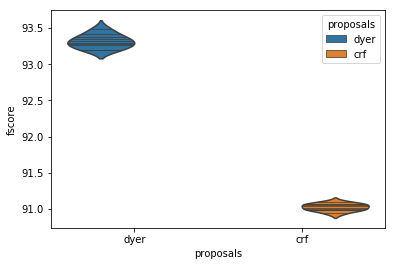

In [55]:
dyer_results['proposals'] = 'dyer'
crf_results['proposals'] = 'crf'

results = pd.concat([dyer_results, crf_results])

sns.violinplot(data=results, x='proposals', y='fscore', inner='stick', hue='proposals')

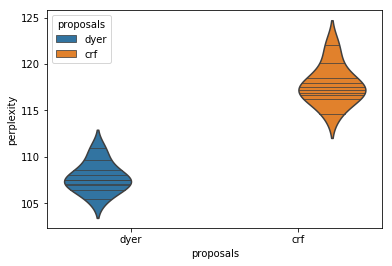

In [56]:
dyer_results['proposals'] = 'dyer'
crf_results['proposals'] = 'crf'

results = pd.concat([dyer_results, crf_results])

sns.violinplot(data=results, x='proposals', y='perplexity', inner='stick', hue='proposals')